In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stk_idx = np.array([])
stk_return = np.array([])
stk_risk = np.array([])

stk_num = np.size(stk_idx) # How many stocks? 

# Continuous weights (0,1) Monte Carlo

### Get Price at the end of each day

In [26]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'smWr-zbs_z2qHLFTPEht'
selected = ['GOOGL', 'MSFT', 'AMZN'] #, \
            #WB, ADBE, GOOGL, MSFT, FB, AMZN, AAPL, BRK.B, NEE, ALB, MTUM, \
            #TAN, TQQQ, QQQ, UPRO, IVV, XBI, VGT, FDN, ITA, TLT, MA]
data = quandl.get_table(
            'WIKI/PRICES', 
            ticker = selected,
            qopts = { 'columns': [
                'date', 
                'ticker', 
                'adj_close'
            ]},
            date = { 'gte': '2016-1-1', 'lte': '2019-4-30' }, 
            paginate=True
            )

data.head()

,date,ticker,adj_close
None,,,
0,2018-03-27,MSFT,89.47
1,2018-03-26,MSFT,93.78
2,2018-03-23,MSFT,87.18
3,2018-03-22,MSFT,89.79
4,2018-03-21,MSFT,92.48


In [10]:

# reorganise data pulled by setting date as index with
date_price_table = data.set_index('date')

# PIVOT Table: price of tickers by date
table = date_price_table.pivot(columns='ticker')

date_price_table.head()
table.head()

adj_close                   
ticker          AMZN   GOOGL       MSFT
date                                   
2016-01-04    636.99  759.44  52.181598
2016-01-05    633.79  761.53  52.419653
2016-01-06    632.65  759.33  51.467434
2016-01-07    607.94  741.00  49.677262
2016-01-08    607.05  730.91  49.829617

### Returns Table: Annual Return

In [23]:
# calculate daily return
returns_daily = table.pct_change()
returns_daily.tail()

adj_close                    
ticker          AMZN     GOOGL      MSFT
date                                    
2018-03-21 -0.002931 -0.001643 -0.006979
2018-03-22 -0.023871 -0.037340 -0.029087
2018-03-23 -0.031436 -0.025258 -0.029068
2018-03-26  0.040319  0.026828  0.075705
2018-03-27 -0.037799 -0.044731 -0.045959

In [ ]:

# calculate annual return 
# NOTE 50 weeks = 250 working days 
returns_annual = returns_daily.mean() * 250
returns_annual.head()

### Simulation Config: 50 k

In [24]:
# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

### Run Simulation
- #### Generate weights: Random: 0-1, Random(num): Sum of random floats = 1
- #### Generate weighted return & volatility
- #### Add to lists

In [ ]:
# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    returns = np.sum(weights * returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

### Create an object
{
    'Returns': [],
    'Volatility': [],
    'MSFT Weight': NUM 
}

In [ ]:

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

### Create Dataframe

In [ ]:

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

### Plot data with Seaborn

In [ ]:

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)

returns = np.array(port_returns)
risk = np.array(port_volatility)
max_idx = np.where(returns / risk == np.max(returns / risk))[0][0]
plt.plot(port_volatility[max_idx], port_returns[max_idx], 'o', color='C2')

plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

### Get Optimal

In [114]:
# Get Optimal: max_ratio = MAX(return / risk)
returns = np.array(port_returns)
risk = np.array(port_volatility)
max_ratio = np.max(returns/risk)

print(max_ratio)

array([6.50973458e-01, 7.02718901e-05, 3.48956270e-01])

In [ ]:
# Get array with max weight
max_idx = np.where(returns/risk == max_ratio)
print(max_idx[0][0])

# Get weights
opt_weights = stock_weights[max_idx[0][0]]
opt_weights

In [31]:
np.sum(opt_weights)

1.0000000000000002

# Discrete Monte Carlo: integer no. of stocks

In [100]:
# stock prices
stock_prices = np.array([1000, 100, 2000])
port_value = 100000
N_max = np.round(port_value / stock_prices)
num_stocks = num_stocks_match(port_value, stock_prices, num_trials=10)
N_max, num_stocks, np.matmul(num_stocks, stock_prices)

(array([ 100., 1000.,   50.]),
 [array([ 59., 247.,   4.]),
  array([  5., 513.,  19.]),
  array([12., 62., 36.]),
  array([87., 98.,  1.]),
  array([ 5., 48., 44.]),
  array([  6., 185.,  36.]),
  array([97.,  8.,  1.]),
  array([ 22., 681.,   4.]),
  array([21., 86., 31.]),
  array([83., 98.,  3.])],
 array([91700., 94300., 90200., 98800., 97800., 96500., 99800., 98100.,
        91600., 98800.]))

In [55]:
def num_stocks_match(port_value, stock_prices, num_trials=1):
    N_max = port_value / stock_prices
    num_assets = np.size(stock_prices)
    
    def rand_num_stocks(num_assets, N_max):
        stock_weights = np.zeros(num_assets)
        for i in np.arange(num_assets):
            stock_weights[i] = np.random.randint(0, N_max[i] + 1)
        return stock_weights
    
    num_stocks = []
    count = 0
    
    while count < num_trials:
        num_stock_trial = rand_num_stocks(num_assets, N_max)
        price_trial = np.sum(num_stock_trial * stock_prices)
        
        if price_trial >= 0.90 * port_value and price_trial <= port_value:
            num_stocks.append(num_stock_trial)
            count += 1
            
    return num_stocks

In [131]:
# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'smWr-zbs_z2qHLFTPEht'
selected = ['GOOGL', 'MSFT', 'AMZN'] #, \
            #WB, ADBE, GOOGL, MSFT, FB, AMZN, AAPL, BRK.B, NEE, ALB, MTUM, \
            #TAN, TQQQ, QQQ, UPRO, IVV, XBI, VGT, FDN, ITA, TLT, MA]
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2019-4-30' }, paginate=True)

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

In [74]:
np.shape(num_stocks_trials)[0]

1000

In [130]:
def calc_volatility(num_stocks_trials, cov_annual, stock_prices):
    num_trials = np.shape(num_stocks_trials)[0]
    port_volatility = np.zeros(num_trials)
    
    weight_stocks_trials = num_to_weight(num_stocks_trials, stock_prices)
    
    for row in np.arange(num_trials):
        stock_weights = weight_stocks_trials[row]
        port_volatility[row] = np.sqrt(np.matmul(np.matmul(stock_weights, cov_annual), np.transpose(stock_weights)))
        
    return port_volatility

In [133]:
def calc_returns(num_stocks_trials, returns_annual, stock_prices):
    weight_stocks_trials = num_to_weight(num_stocks_trials, stock_prices)
    port_returns = np.matmul(weight_stocks_trials, returns_annual)
    return port_returns

In [121]:
def num_to_weight(num_stocks_trials, stock_prices):
    num_trials = np.shape(num_stocks_trials)[0]
    weight_stocks_trials = []
    
    for row in np.arange(num_trials):
        weight_stocks_trials.append((num_stocks_trials[row] * stock_prices) / np.sum(num_stocks_trials[row] * stock_prices))
        
    return weight_stocks_trials

In [127]:
weight_stocks_trials = num_to_weight(num_stocks_trials, stock_prices)
weight_stocks_trials[0]

array([0.3877551 , 0.02040816, 0.59183673])

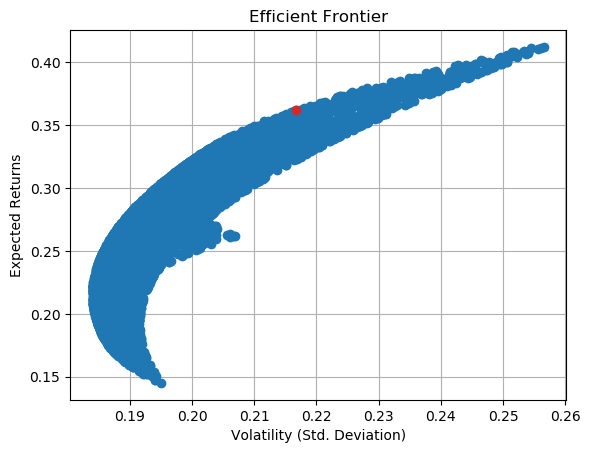

In [155]:
# stock prices
stock_prices = np.array([1000, 100, 2000])
port_value = 100000
N_max = np.round(port_value / stock_prices)
num_stocks_trials = num_stocks_match(port_value, stock_prices, num_trials=5000)

# calculate port_returns
port_returns = calc_returns(num_stocks_trials, returns_annual, stock_prices)
port_volatility = calc_volatility(num_stocks_trials, cov_annual, stock_prices)

# plot the efficient frontier with a scatter plot
import matplotlib.pyplot as plt
plt.style.use('default')
ax, fig = plt.subplots()
plt.plot(port_volatility, port_returns, 'o')
max_idx = np.where(port_returns / port_volatility == np.max(port_returns / port_volatility))[0][0]
plt.plot(port_volatility[max_idx], port_returns[max_idx], 'o', color='C3')
plt.grid()
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [143]:
returns = port_returns
risk = port_volatility
max_ratio = np.max(returns/risk)
max_idx = np.where(returns/risk == max_ratio)
opt_weights = num_stocks_trials[max_idx[0][0]]
opt_weights, np.sum(opt_weights * stock_prices)

(array([65.,  0., 17.]), 99000.0)

In [ ]:
##### a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()